# Random Walk in one dimension
* Create a random walk in one dimension by assuming 50% propbability of moving right or left
* Make a plot of the path after $N$ steps, use $N=10000$

## Solution

In [3]:
import numpy as np 
import matplotlib.pyplot as plt


## Solution A

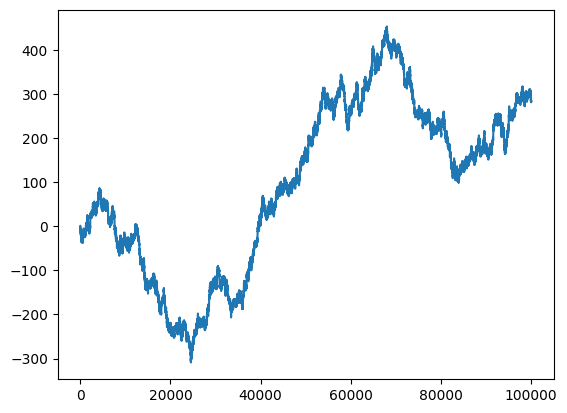

In [4]:
N=100000
distance=[0]
for i in range(N):
    step = -1 
    if np.random.randint(0,2) == 0:
        step=1
    distance.append(distance[-1]+step)

plt.plot(distance)

## Solution B

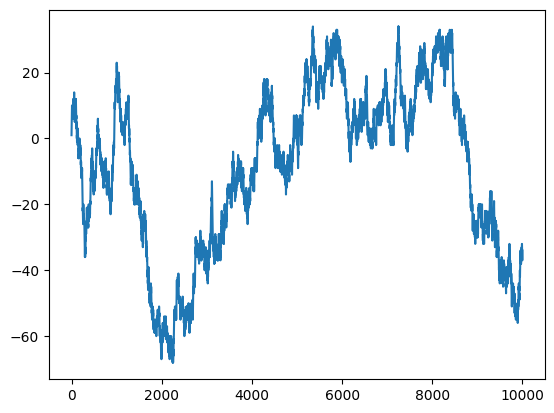

In [5]:
N=10000
x=2*np.random.randint(0,2,size=N)-1
distance = np.cumsum(x)
plt.plot(distance)

# Random Walk in 2 Dimensions

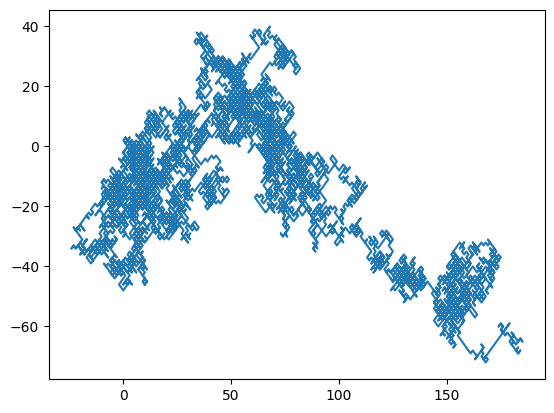

In [6]:
N=10000
x=2*np.random.randint(0,2,size=N)-1
y=2*np.random.randint(0,2,size=N)-1
plt.plot(np.cumsum(x),np.cumsum(y))

# Random Walk in 3D

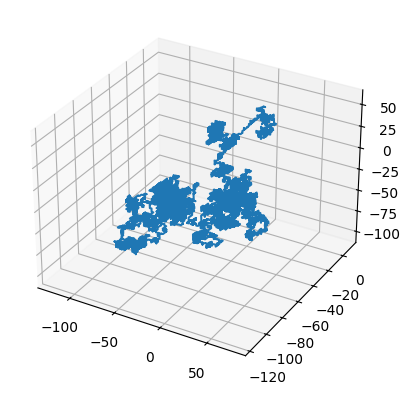

In [7]:
ax = plt.figure().add_subplot(projection='3d')
x=2*np.random.randint(0,2,size=N)-1
y=2*np.random.randint(0,2,size=N)-1
z=2*np.random.randint(0,2,size=N)-1
ax.plot(np.cumsum(x),np.cumsum(y),np.cumsum(z))


# How can we know that the figure above is a result from a random walk?
The output from a random walk can, as we have seen, create many different paths, but what they have in common is that from on step to the next step there is a 50% chance of moving left or right. Thus, we can analyze the figure above by analyzing how the moves after each step is *distributed*. Below we find the size of each move, and then we make a histogram. 


In [8]:
print(distance)
print(distance[1:]-distance[:-1])


[  1   2   3 ... -36 -35 -34]
[1 1 1 ... 1 1 1]


(array([5017.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4982.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

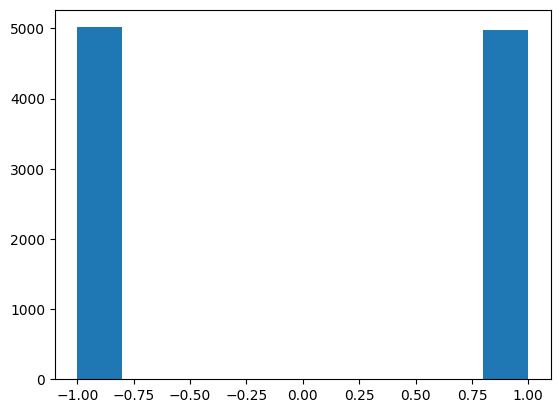

In [9]:
moves=distance[1:]-distance[:-1]
plt.hist(moves)

Notice that the histogram says that we have about 50% chance of making a move with a step of -1 or +1.

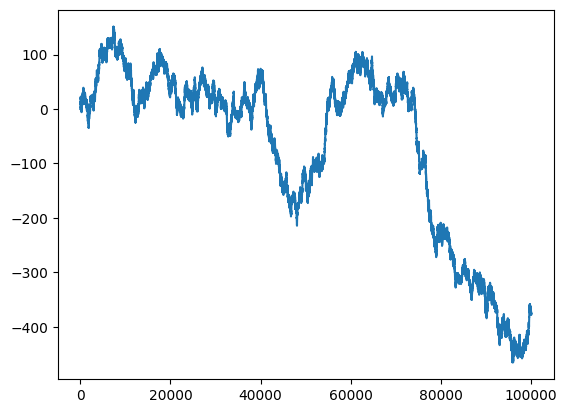

In [27]:
N=100000
distance=[0]
for i in range(N):
    
    # step = np.random.uniform(-1, 1)
    step = np.random.normal(0, 1)
    distance.append(distance[-1]+step)

plt.plot(distance)

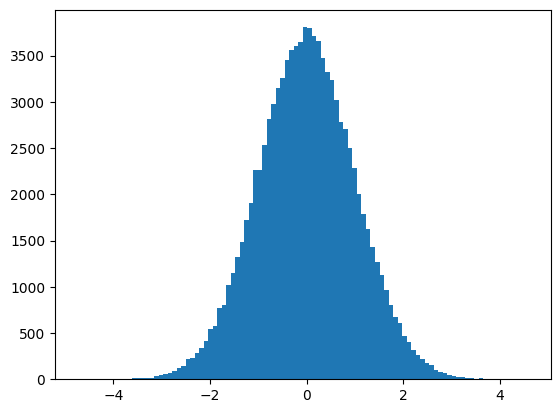

In [28]:
moves = np.array(distance[1:]) - np.array(distance[:-1])
plot = plt.hist(moves, bins=100)

# What about the stock marked?
Just as with the random walk we can analyze a stock, using the same trick. We look at the variation from one day to the next, if there is an equal probability of moving left or right (i.e. up or down), then from a modeling perspective we can treat the stock development as a random process.   

In [35]:
#!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns #not necessary 
from scipy.stats import norm

In [53]:
#ticker = 'AAPL' # Apple
ticker = 'EQNR'  # Equinor
ticker_data = yf.download(ticker, start='2020-01-01', end='2025-09-14')
ticker_data


/tmp/ipykernel_34970/2469064546.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(ticker, start='2020-01-01', end='2025-09-14')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,EQNR,EQNR,EQNR,EQNR,EQNR
Date,,,,,
2020-01-02,13.919793,13.919793,13.735831,13.810779,2080800
2020-01-03,13.960676,14.062877,13.892542,14.028811,1812700
2020-01-06,14.280903,14.335411,14.226396,14.240023,1443300
2020-01-07,14.117383,14.131010,13.994743,14.090130,928200
2020-01-08,14.008368,14.165078,13.933422,14.131010,1618900
...,...,...,...,...,...
2025-09-08,24.280001,24.299999,23.889999,24.100000,4747900
2025-09-09,24.230000,24.510000,24.200001,24.340000,2912100


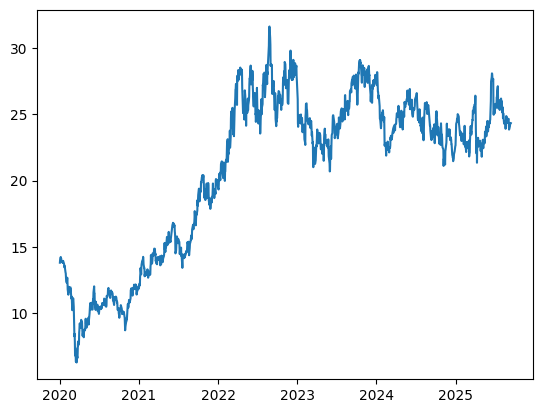

In [59]:
plt.plot(ticker_data.index, ticker_data['Open']) # plot historical stock prize

In [60]:
ticker_data.head() # first rows of data frame

Price,Close,High,Low,Open,Volume
Ticker,EQNR,EQNR,EQNR,EQNR,EQNR
Date,,,,,
2020-01-02,13.919793,13.919793,13.735831,13.810779,2080800
2020-01-03,13.960676,14.062877,13.892542,14.028811,1812700
2020-01-06,14.280903,14.335411,14.226396,14.240023,1443300
2020-01-07,14.117383,14.131010,13.994743,14.090130,928200
2020-01-08,14.008368,14.165078,13.933422,14.131010,1618900


In [61]:
data = ticker_data['Close'].to_numpy()

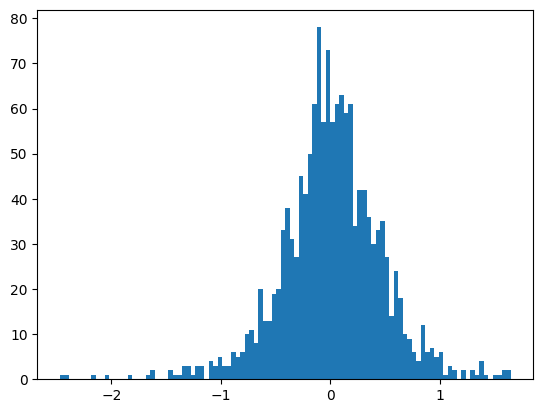

In [63]:
moves = data[1:] - data[:-1]
plot = plt.hist(moves, bins=100)

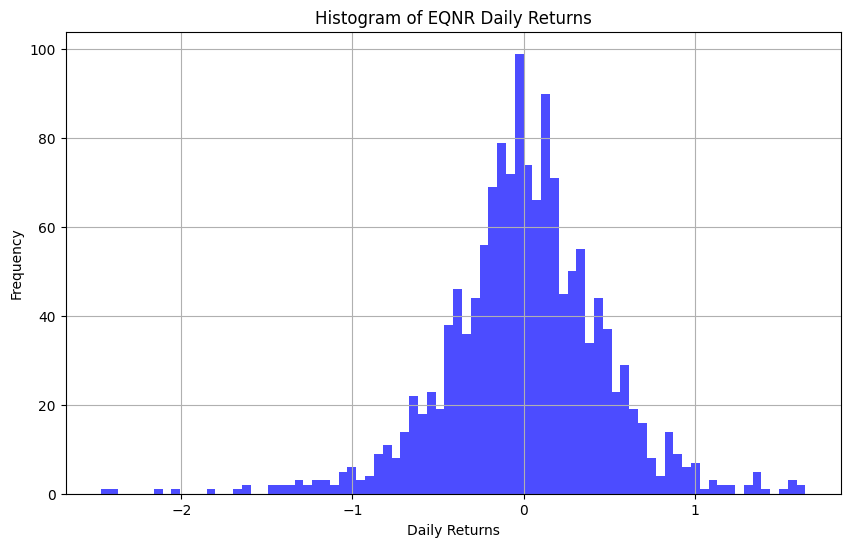

In [64]:
# Plot the histogram of the daily returns
plt.figure(figsize=(10, 6))
plt.hist(moves, bins=80, color='blue', alpha=0.7)
plt.title('Histogram of '+ticker+' Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

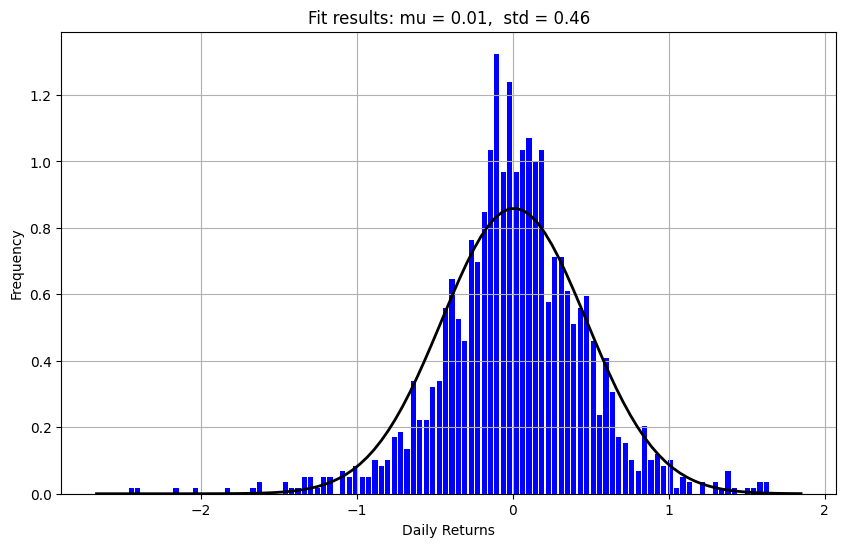

In [67]:
# Calculate the mean and standard deviation of the returns
mu, std = norm.fit(moves)
# Plot the histogram again along with the normal distribution
plt.figure(figsize=(10, 6))
#sns.histplot(ticker_data['Return'], kde=False, bins=100, color='blue',stat='density')
# or matplotlib
plt.hist(moves, bins=100, color='blue',density=True,rwidth=0.8)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The above figure has a different shape than our random walk, but it is symmetric and bell shapes. This is the reason that people claim that the stock marked follows a Gaussian random walk, i.e. that the next step is determined from a Gaussian distribution with zero mean. If it is true that stock price development follows a random walk, it means that we cannot use past performance to predict development in the future. This in turns implies that taking advice from experts or performing technical analyzes is a waste of time and one is better off buying index funds. 

For more information and references, check this [article](https://www.investopedia.com/terms/r/randomwalktheory.asp).

## Excercise 2
In this exercise we are going to investigate more than one walker. Assume that we release $M=1000$ walkers from the same starting point, $x=0$.
* Calculate the mean of the random walkers
* Calculate the standard deviation of the walk
* Make a plot of the standard deviation squared (the variance) vs the number of steps taken, use $N=10, 100, 1000, 10000, 100000$

## Solution

In [26]:
def random_walk_1d(N,p=0.1):
    '''
    random walk in 1D
    if x<p move left if x>(1-p) move right else stay
    Note: thiw works because Python treats True and False as 1 and zero
    '''
    x=np.random.uniform(size=N)
    steps = (-1.)*(x<p) + (1.)*(x>(1-p))
    return np.cumsum(steps)


(array([  3.,   2.,   2.,   2.,   3.,   3.,   4.,   4.,   8.,   2.,   5.,
          6.,  12.,  11.,   5.,  16.,  20.,  25.,  33.,  32.,  31.,  44.,
         40.,  56.,  69., 145.,  87.,  86., 102., 120., 121., 141., 154.,
        161., 158., 188., 189., 181., 243., 213., 234., 253., 265., 253.,
        267., 275., 283., 300., 288., 298., 526., 268., 286., 252., 220.,
        257., 223., 215., 215., 184., 187., 206., 144., 151., 136., 119.,
        127., 100.,  91.,  94.,  78.,  57.,  60.,  57.,  54.,  73.,  26.,
         30.,  16.,  26.,  15.,  13.,   7.,  11.,   6.,   6.,   2.,   8.,
          4.,   2.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.]),
 array([-50.  , -48.96, -47.92, -46.88, -45.84, -44.8 , -43.76, -42.72,
        -41.68, -40.64, -39.6 , -38.56, -37.52, -36.48, -35.44, -34.4 ,
        -33.36, -32.32, -31.28, -30.24, -29.2 , -28.16, -27.12, -26.08,
        -25.04, -24.  , -22.96, -21.92, -20.88, -19.84, -18.8 , -17.76,
        -16.72, -15.68, -14.64

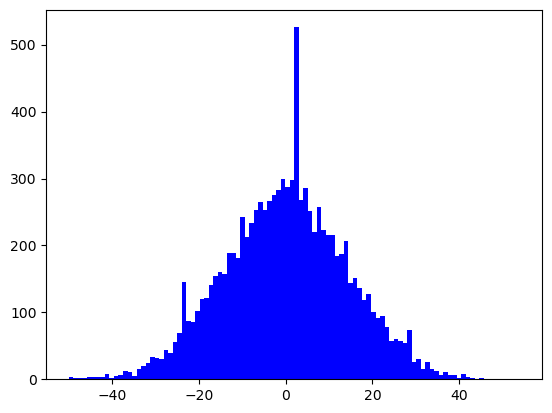

In [28]:
def random_walkers(no_walkers=10000,no_step=1000,p=0.1):
    '''
    M: is the number of walkers
    N: Number of steps taken
    '''
    distance=[]
    for i in range(no_walkers):
        distance.append(random_walk_1d(no_step,p=p)[-1]) # appends how far the walker got
    return distance

m=random_walkers()
plt.hist(m, bins=100, color='blue')
 

In [30]:
random_walk_1d(N,p=0.1)

array([ 0.,  1.,  1., ..., 33., 33., 33.])

Note that the mean is like a bell shaped curve. If we were to do the same experiment again by letting the walkers only be able to move 10, 100, 1000, 10000 steps. You would see for 10 step a concentrated mean about $x=0$, and then a bell shaped curve with larger and larger standard deviation (still with symmetric about $x=0$). This is exactly what we would expect from a diffusion process.

# Random Walk as a diffusion process
Consider the figure below, assume that we have $N_i$ walkers at position $i$, $N_{i+1}$ walkers at position $i+1$, and $N_{i-1}$ walkers at position $i-1$ at time $t$. There is a probability of $p=1/2$ of moving left or right. After one step, $t+\Delta t$, there will be $N_i(t+\Delta t)$ particles in position $i$.

<img src="rw_diff.jpg" width=400><p style="font-size: 0.9em"><i>Figure 1: Distribution of random walkers in 1D.</i></p>
   

The above equation can be written
$$
\begin{equation}
\frac{N_i(t+\Delta t)-N_i(t)}{\Delta t}=\frac{p\Delta x^2}{\Delta t}\left(\frac{N_{i+1}+N_{i-1}-2N_i}{\Delta x^2}\right).\tag{1}
\end{equation}
$$
Taking the limit $\Delta x\to 0$ and $\Delta t\to 0$, we can write this equation as a differential equation
$$
\begin{equation}
\frac{\partial N(t,x)}{\partial t}=D\frac{\partial^2N(t,x)}{\partial x^2},\tag{2}
\end{equation}
$$ 
where $D\equiv p\Delta x^2/\Delta t$ is the diffusion constant. By dividing by a volume of each side we can write this equation in terms of concentrations $c\equiv N/V$ 
$$
\begin{equation}
\frac{\partial c(t,x)}{\partial t}=D\frac{\partial^2c(t,x)}{\partial x^2},\tag{2}
\end{equation}
$$ 

# Numerical Solution in 1D in the domain $[-L,L]$
We are interested in studying the solution when there is a concentration of 1 in the centre ($x=0$) and we will keep the system large enough to avoid the concentration to reach the ends, hence we will just put $c(-L)=c(L)=0$. We will chose and explicit in space formulation and implicit in time formulation (as before). 


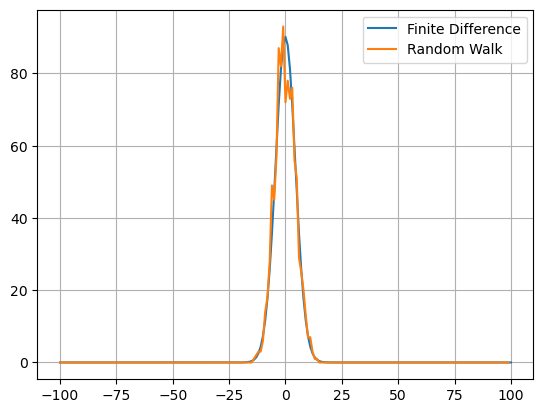

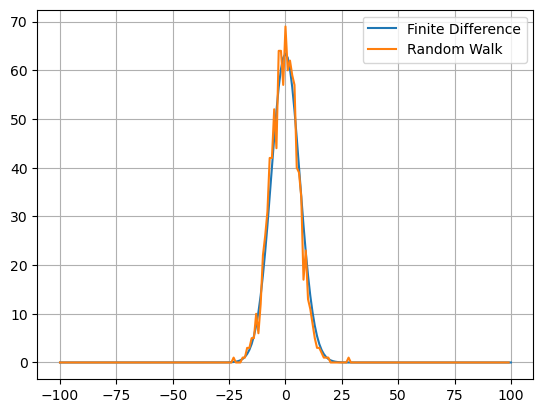

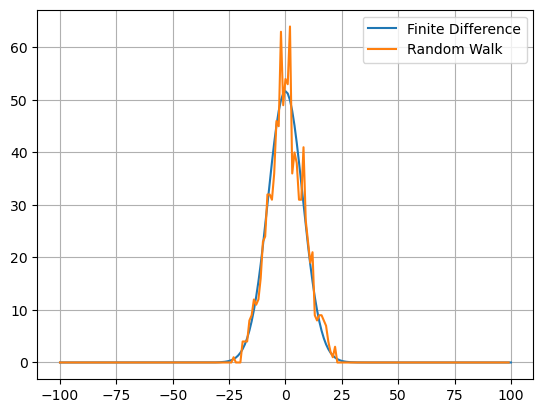

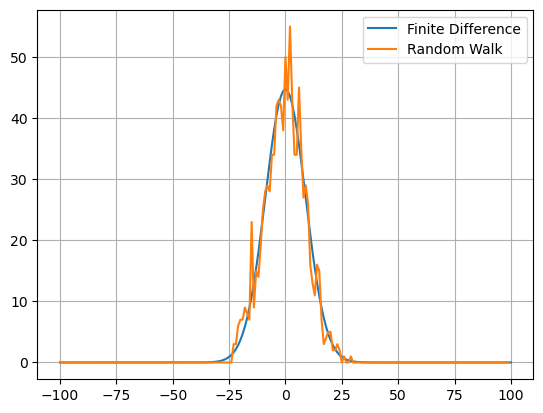

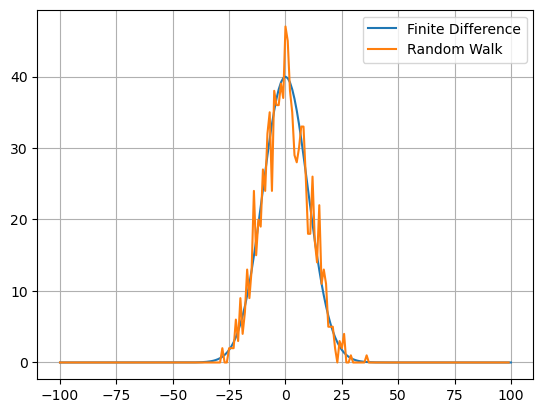

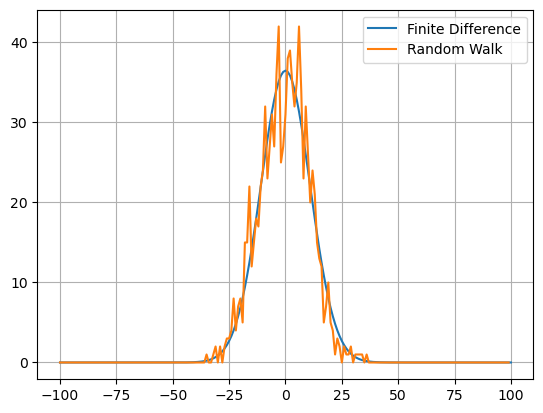

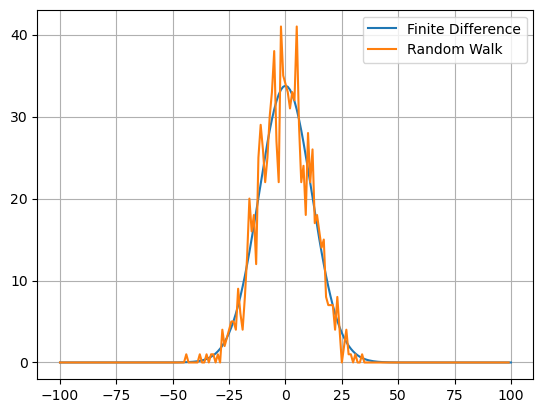

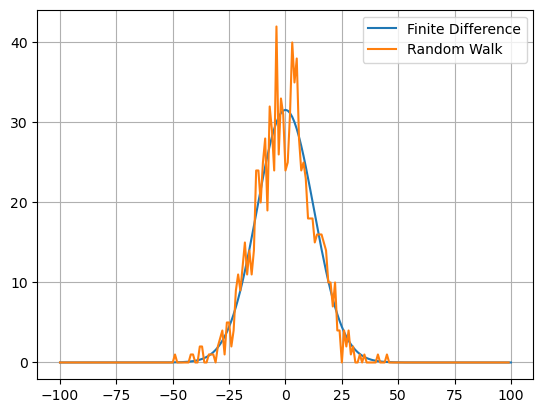

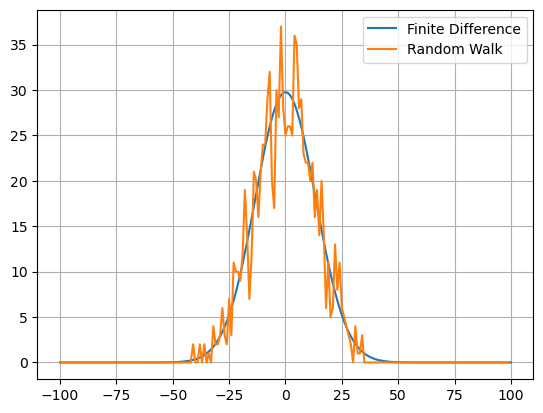

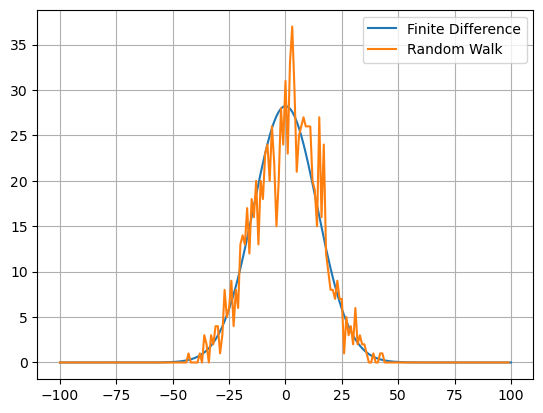

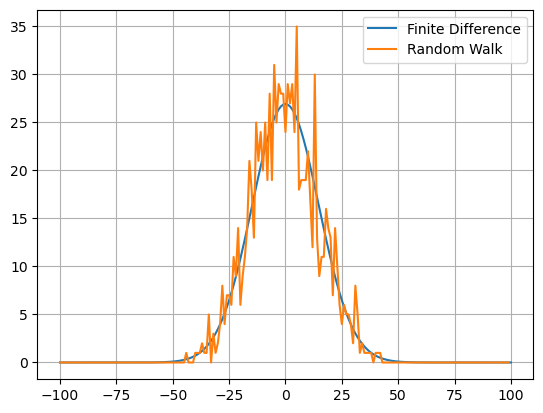

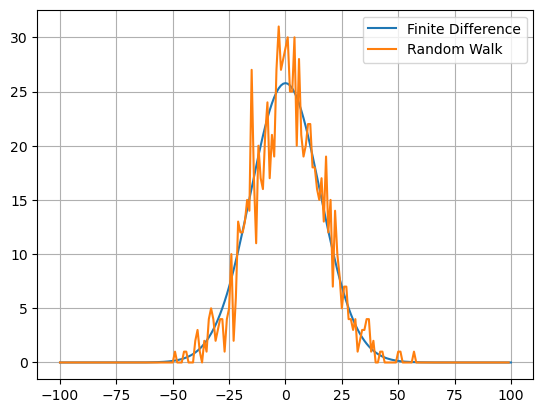

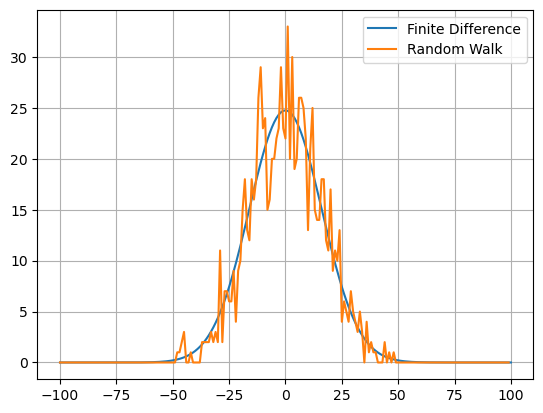

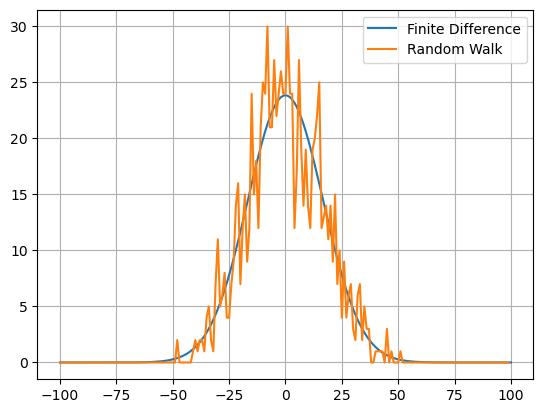

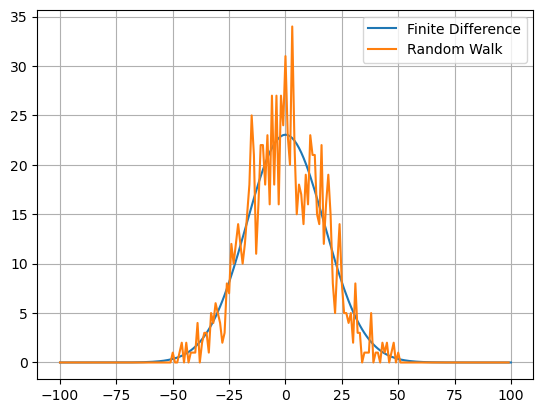

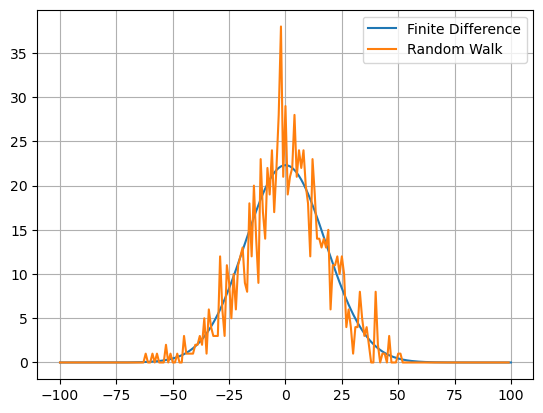

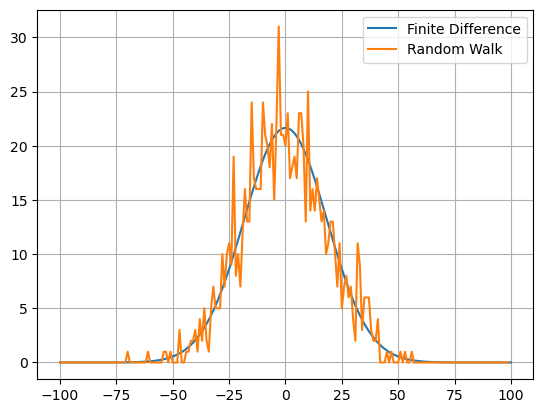

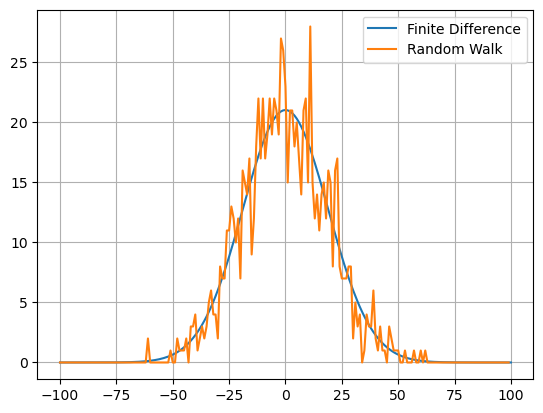

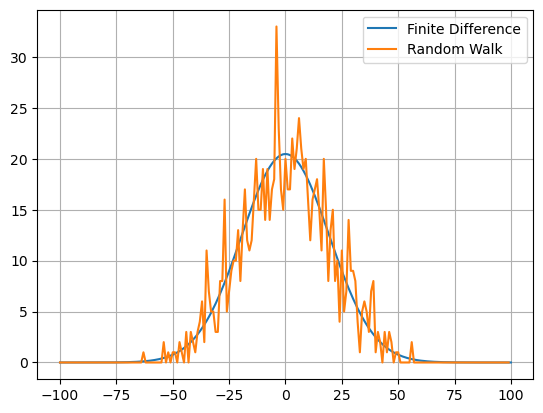

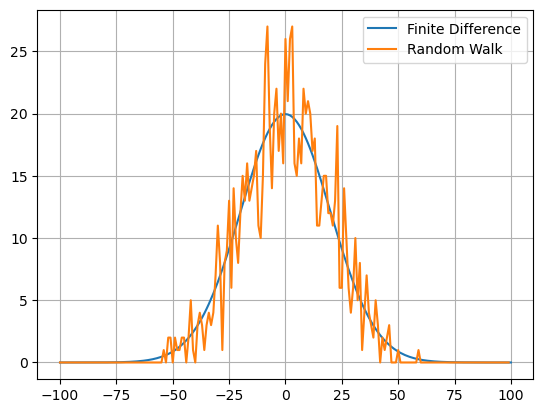

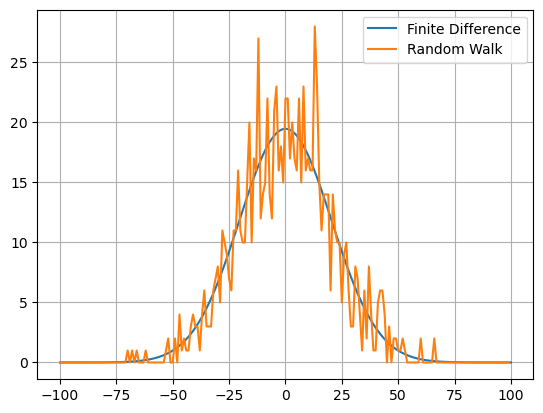

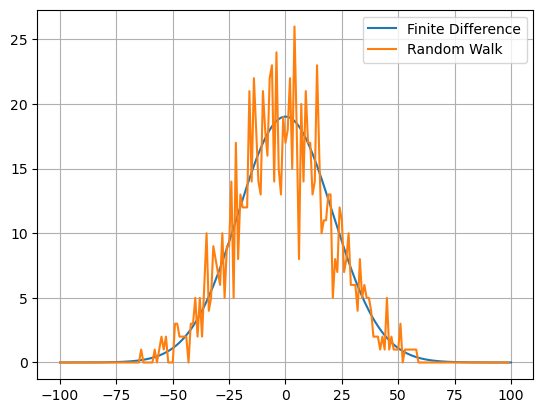

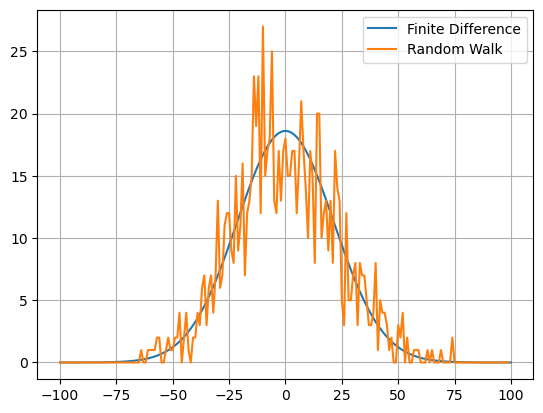

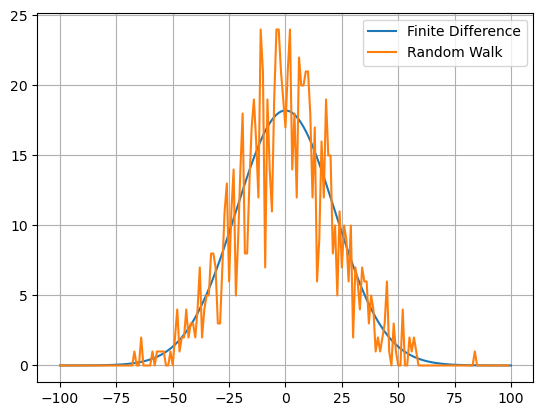

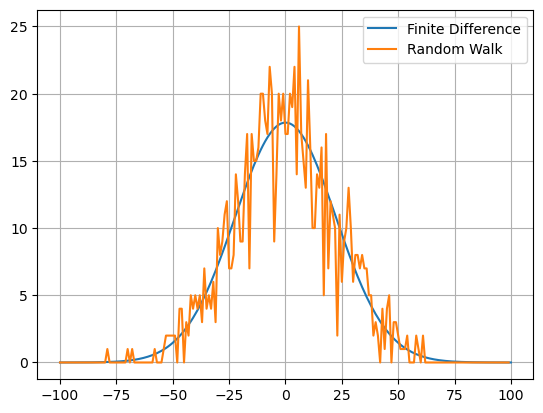

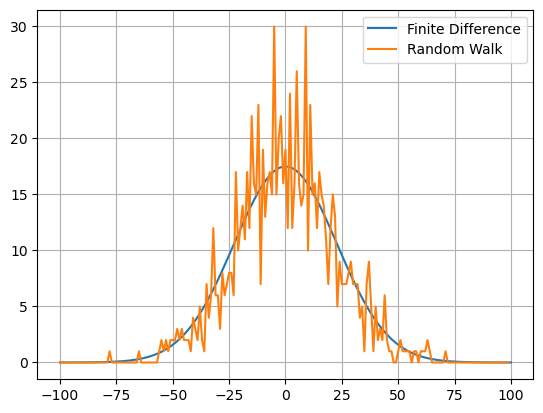

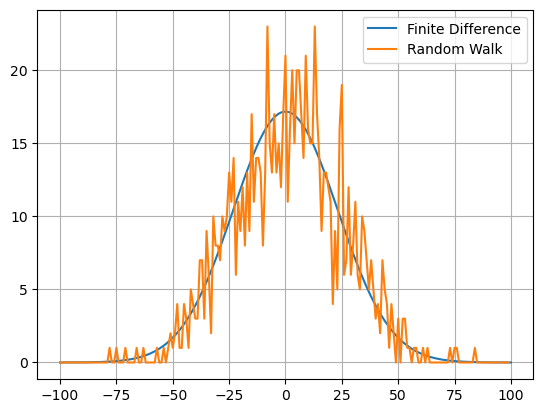

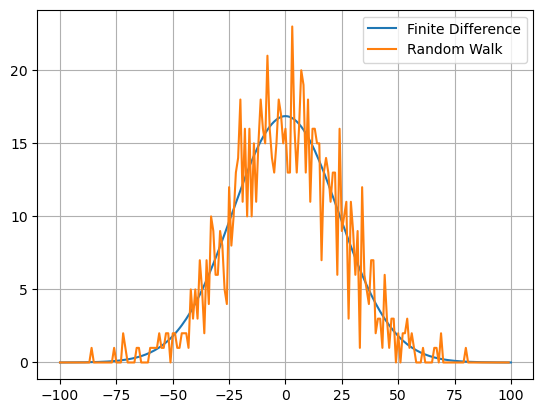

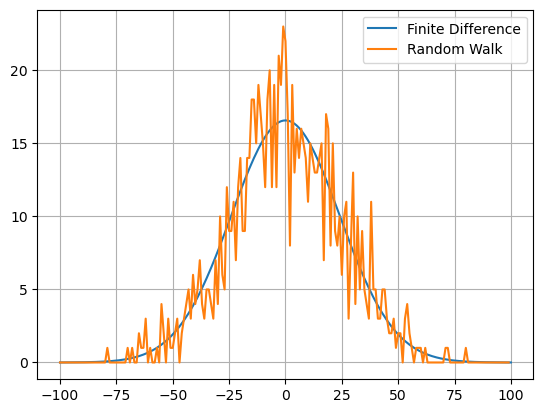

In [29]:
L = 100 # size of domain
M=3000 # no of timesteps
no_walkers=1000
Nx = np.linspace(-L,L,2*L+1)
xc = 0.5*(Nx[:-1]+Nx[1:])
p=.1
dt=dx=1
D=p*(dx*dx)/dt
a=np.repeat(-D,2*L)
b=np.repeat(1+2*D,2*L+1)
c=np.repeat(-D,2*L)
A=np.diag(a,k=-1)+np.diag(b,k=0)+np.diag(c,k=1)
N0=np.zeros(2*L+1)
N0[L]=no_walkers # concentration 1 in the middle
t=1
while t<M:
    Nnext=np.linalg.solve(A,N0)
    N0=Nnext
    t=t+1
    if t%100 == 1:
        plt.plot(Nx,N0,label='Finite Difference')
        m=random_walkers(no_step=t,no_walkers=no_walkers)
        mm,ss=np.histogram(m,Nx)
        plt.plot(Nx[:-1],mm,label='Random Walk')
        plt.grid()
        plt.legend()
        plt.show()
        plt.close()

